In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
model = tf.keras.Sequential(layers=[tf.keras.layers.Flatten(input_shape=(28, 28)), #입력층
                                    tf.keras.layers.Dense(128, activation="relu"), #은닉층
                                    tf.keras.layers.Dropout(0.2),                  #은닉층
                                    tf.keras.layers.Dense(10, activation="softmax")]) #출력층
model.summary()


11490434/11490434 [==============================] - 2s 0us/step


2023-09-11 19:06:45.001070: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-11 19:06:45.001094: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-11 19:06:45.001108: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-11 19:06:45.001176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-11 19:06:45.001210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
x_train.shape

(60000, 28, 28)

In [5]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


2023-09-11 19:07:03.567570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 29.3429 - accuracy: 0.8202
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 26.1160 - accuracy: 0.8507
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 26.8267 - accuracy: 0.8455
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 29.6240 - accuracy: 0.8471
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 34.3095 - accuracy: 0.8469


In [6]:
# 케라스 모델의 정확도는 evaluate 메서드를 이용해서 확인 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n테스트 정확도 :", test_acc)

2023-09-11 19:08:05.572033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 33.9801 - accuracy: 0.8394 - 1s/epoch - 4ms/step

테스트 정확도 : 0.839400053024292


 98/313 [========>.....................] - ETA: 0s

2023-09-11 19:09:01.869714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
예측값:7, 실제값:7


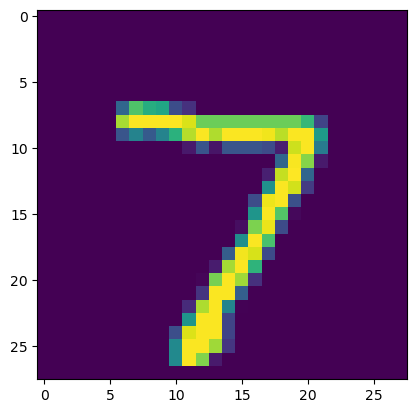

In [8]:
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(x_test)
pred = np.argmax(predictions[0])  #predictions[0]은 10개의 값을 가진다. 그중 가장 큰 값!
print("예측값:{}, 실제값:{}".format(pred, y_test[0])) 
plt.imshow(x_test[0])
plt.show()


In [9]:
history.history


{'loss': [29.342926025390625,
  26.116004943847656,
  26.826717376708984,
  29.624034881591797,
  34.30949783325195],
 'accuracy': [0.8201833367347717,
  0.8507000207901001,
  0.8454999923706055,
  0.847083330154419,
  0.846916675567627]}

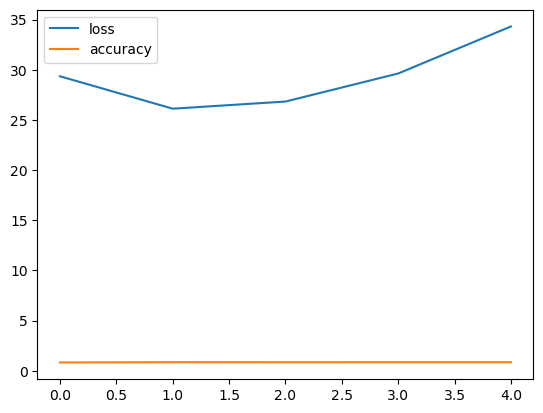

In [10]:
plt.plot(history.history["loss"]) 
plt.plot(history.history["accuracy"]) 
plt.legend(["loss", "accuracy"]) 
plt.show()

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 패션 MNIST 데이터셋 임포트
fashion_mnist = keras.datasets.fashion_mnist

In [15]:
# train_images와 train_labels 배열은 모델 학습에 사용되는 훈렦 세트
# test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [16]:
class_names = ['T-shirt/top', 'Trouser', 
               'Pullover', 'Dress', 
               'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 
               'Bag', 'Ankle boot']

In [17]:
len(train_labels)

60000

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

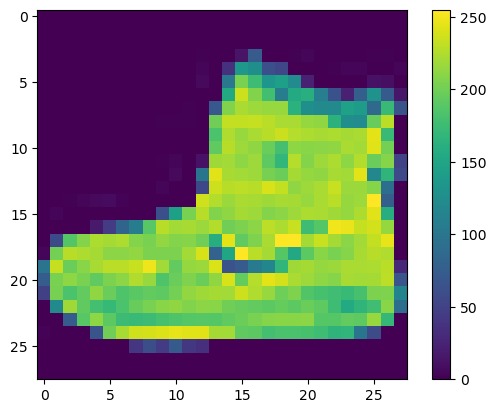

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False) 
plt.show()


In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

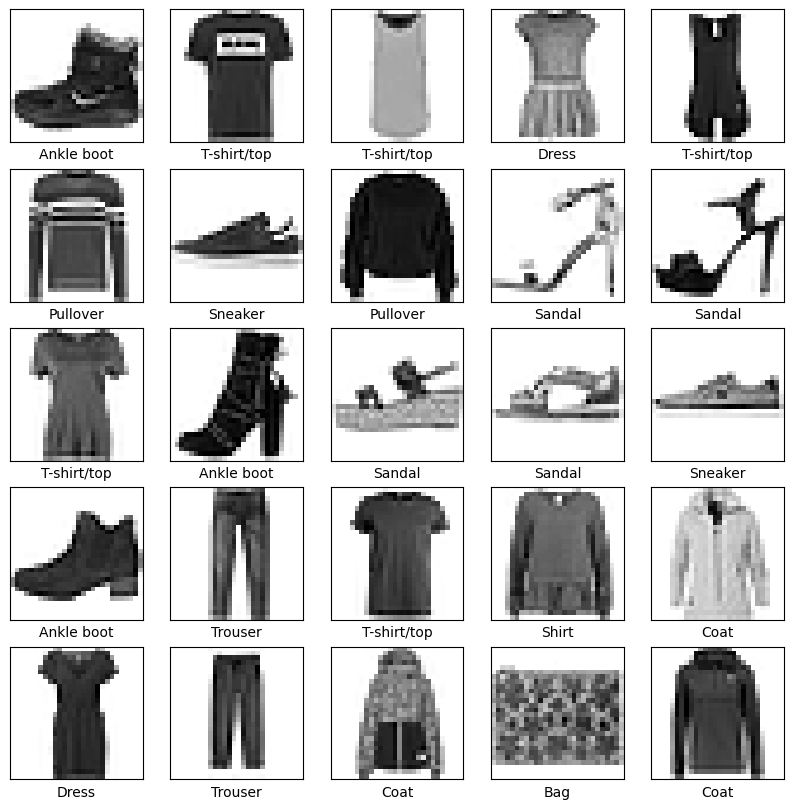

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [26]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'), 
                          keras.layers.Dense(10, activation='softmax')]) 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
  23/1875 [..............................] - ETA: 8s - loss: 1.5170 - accuracy: 0.4538

2023-09-11 19:24:47.273883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.5475 - accuracy: 0.8105
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4705 - accuracy: 0.8382
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4679 - accuracy: 0.8411
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4657 - accuracy: 0.8430
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4663 - accuracy: 0.8415


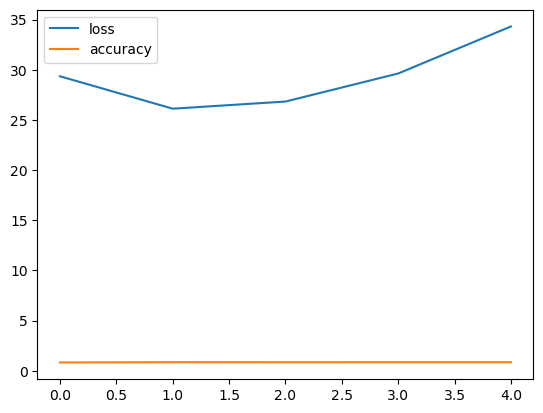

In [44]:
# 손실과 정확도 그래프로 확인
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"]) 
plt.legend(["loss", "accuracy"])
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)


2023-09-11 19:25:34.928463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.5461 - accuracy: 0.8198 - 1s/epoch - 4ms/step

테스트 정확도: 0.8198000192642212


In [29]:
predictions = model.predict(test_images)


 91/313 [=======>......................] - ETA: 0s

2023-09-11 19:25:48.515729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [30]:
predictions[0]

array([5.9928671e-09, 6.9846323e-11, 1.3681863e-06, 6.0841550e-08,
       3.0077010e-07, 8.2708739e-02, 1.2969372e-06, 6.2625515e-03,
       1.8288300e-04, 9.1084284e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
# 10개 클래스에 대핚 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

In [34]:
def plot_value_array(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array[i], true_label[i] 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777") 
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array) 
    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('blue')

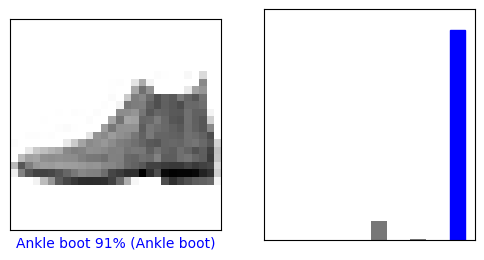

In [35]:
i= 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images) 
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

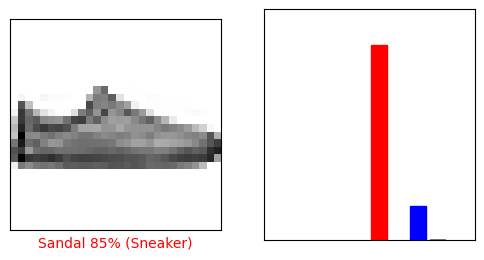

In [37]:
# 12번째 원소의 이미지, 예측, 싞뢰도 점수 배열 확인
# 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색 
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images) 
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

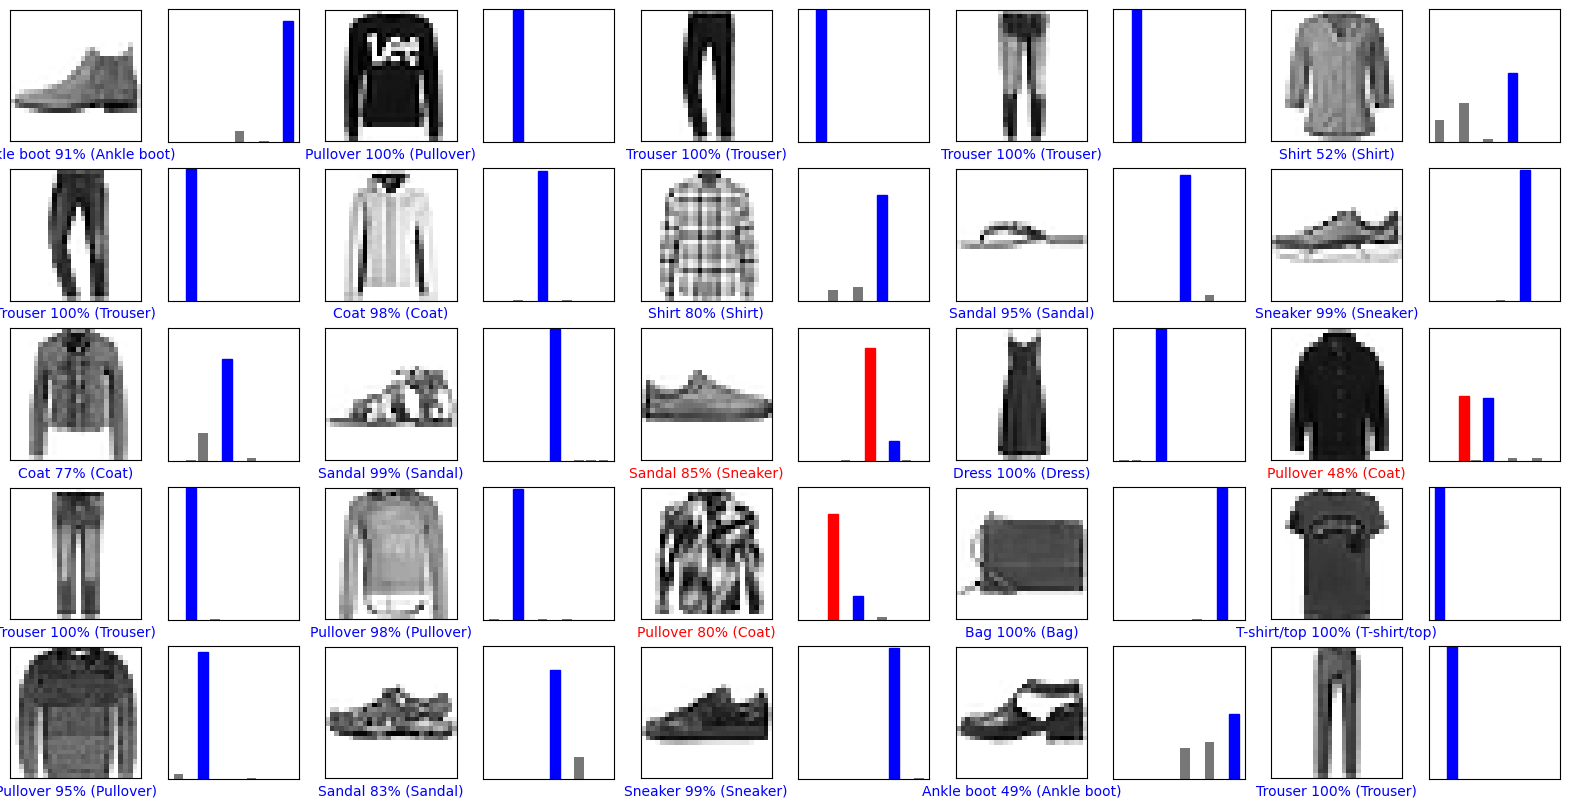

In [45]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) 
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1) 
    plot_image(i, predictions, test_labels, test_images) 
    plt.subplot(num_rows, 2*num_cols, 2*i+2) 
    plot_value_array(i, predictions, test_labels)
plt.show()


In [39]:
img = test_images[0]
print(img.shape)


(28, 28)


In [40]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = model.predict(img) 
print(predictions_single)

1/1 [==============================] - 0s 267ms/step
[[5.9928684e-09 6.9846524e-11 1.3681865e-06 6.0841636e-08 3.0077015e-07
  8.2708523e-02 1.2969357e-06 6.2625320e-03 1.8288303e-04 9.1084301e-01]]


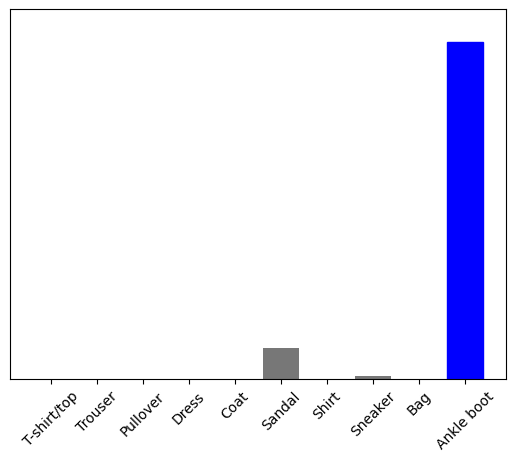

In [42]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [43]:
# model.predict는 2차원 넘파이 배열을 반홖하므로 첫 번째 이미지의 예측 선택
np.argmax(predictions_single[0])

9

# CNN 실습

In [46]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


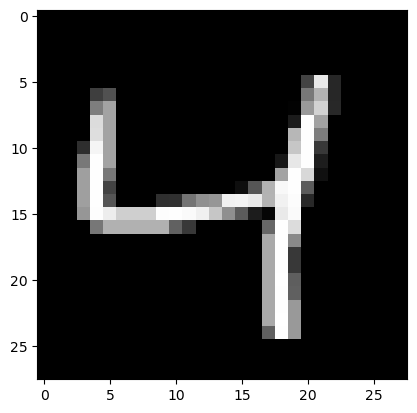

In [47]:
# mnist data download
(x_train, t_train), (x_test, t_test) = mnist.load_data() 
plt.imshow(x_train[2], cmap='gray')

In [48]:
import numpy as np
horizontal_filter = np.array([[1., 1., 1.],
                              [0., 0., 0.],
                              [-1., -1., -1.]]) 
vertical_filter = np.array([[1., 0., -1.],
                            [1., 0., -1.],
                            [1., 0., -1.]])

In [49]:
test_image = x_train[2]
original_image_size = test_image.shape[0]
print("original_image_size = ", original_image_size) 
conv_output_size = int((original_image_size - 3)/1 + 1)
print('output size = ', conv_output_size)

original_image_size =  28
output size =  26


In [50]:
filter_size = 3

In [53]:
def get_conv_image(filter):
    filtered_image = np.zeros((conv_output_size, conv_output_size))
    for i in range(conv_output_size):
        for j in range(conv_output_size):
            # 합성곱 연산
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter 
            indice_sum = np.sum(indice_image)
            if(indice_sum > 255):
                indice_sum = 255 
            filtered_image[i, j] = indice_sum
    return filtered_image

In [54]:
vertical_filtered_image = get_conv_image(vertical_filter)
horizontal_filtered_image = get_conv_image(horizontal_filter)

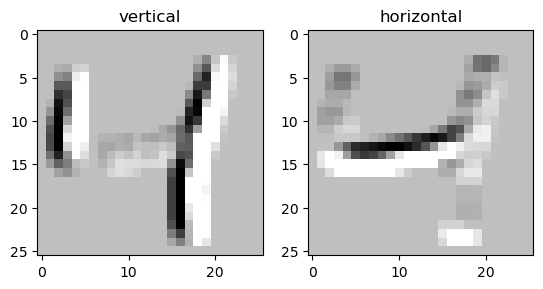

In [62]:
plt.subplot(1, 2, 1)
plt.title('vertical') 
plt.imshow(vertical_filtered_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('horizontal') 
plt.imshow(horizontal_filtered_image, cmap='gray')
plt.show()


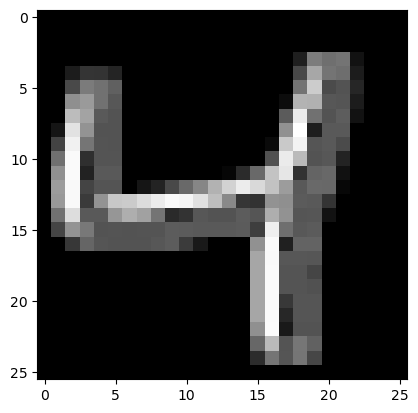

In [57]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))
plt.imshow(sobel_image,cmap='gray')

In [58]:
import numpy as np
image = x_train[2] 
image_x = image.shape[0] 
image_y = image.shape[1]

In [59]:
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

In [60]:
pooled_image = np.zeros((new_image_x, new_image_y))


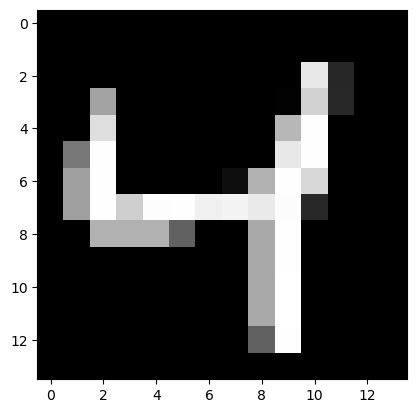

In [61]:
for x in range(0, image_x, 2): 
    for y in range(0, image_y, 2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2]) # pool_size(2,2) 
plt.imshow(pooled_image, cmap='gray')

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
mnist = tf.keras.datasets.mnist # Mnist 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 전처리

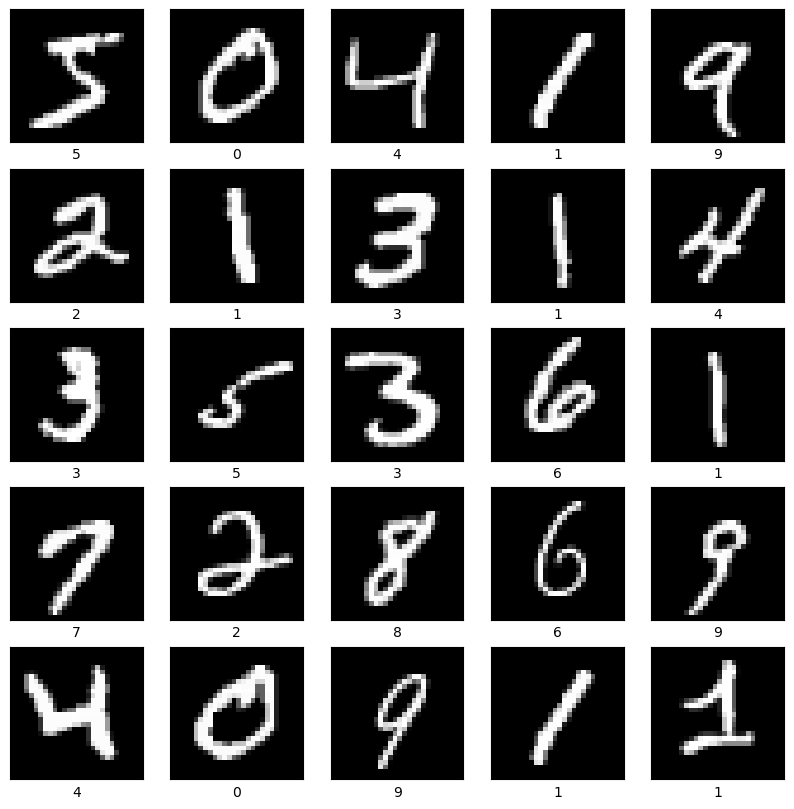

In [65]:
plt.figure(figsize=(10,10)) 
for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
plt.show()

### Conv2D(16,3 or (3,3), padding='valid', input_shape(28,28,1), activation='relu'
- 첫번째 인자: 컨볼루션 필터의 수
- 두번쨰 인자: 컴볼루션 커널의(필터) 행,열 크기
- padding: 경계 처리 방법 정의
    - 'valid':유효한 영역만 출력, 이미지 사이가 작아짐
    - 'same': 출력 이미지 사이즈가 입력 이미지 사이즈와 동일하다
- input_shape: 샘플 수를 제외한 입력 형태 정의. 모델에서 첫 레이어일 때만 정의한다.
    - (행, 열, 채널 수)로 정의한다 흑백영상일 경우 채널이 1이고, 컬러이면 3이다

In [72]:
model = tf.keras.models.Sequential([tf.keras.layers.Reshape((28, 28, 1)),
                                    tf.keras.layers.Conv2D(16, 3, activation='relu'),  #컴벌루션 연산 (풀링연산 제외한 상태)
                                    tf.keras.layers.Flatten(),   #입력층
                                    tf.keras.layers.Dense(128),  #은닉층
                                    tf.keras.layers.Dense(10, activation='softmax')])  #출력층

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
  16/1875 [..............................] - ETA: 12s - loss: 1.2831 - accuracy: 0.5996

2023-09-11 21:41:27.738038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.1579 - accuracy: 0.9538
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0625 - accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0414 - accuracy: 0.9863
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0308 - accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0222 - accuracy: 0.9922


2023-09-11 21:42:32.158972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0749 - accuracy: 0.9806 - 1s/epoch - 4ms/step


[0.07487811893224716, 0.9806000590324402]

In [74]:
inputs = keras.Input(shape=(28, 28))
x = layers.Reshape((28, 28, 1))(inputs)
x = layers.Conv2D(16, 3, activation='relu')(x) 
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(10, activation='softmax')(x) 
outputs = x


In [75]:
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 flatten_5 (Flatten)         (None, 10816)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               1384576   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1386026 (5.29 MB)
Trainable params: 1386026 (

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
  17/1875 [..............................] - ETA: 12s - loss: 1.3016 - accuracy: 0.5901

2023-09-11 22:09:10.304615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.1534 - accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0637 - accuracy: 0.9807
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0452 - accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0317 - accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0245 - accuracy: 0.9920


2023-09-11 22:10:11.816474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0848 - accuracy: 0.9789 - 1s/epoch - 4ms/step


[0.08479093760251999, 0.9789000749588013]

In [78]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [79]:
x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))


In [80]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten_6 (Flatten)         (None, 2704)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               346240    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 347690 (1.33 MB)
Trainable params: 347690 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [81]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [82]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2023-09-11 22:18:43.959625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.1818 - accuracy: 0.9454
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0852 - accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0783 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0871 - accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1138 - accuracy: 0.9756


In [83]:
model.evaluate(x_test, y_test, verbose=2)

2023-09-11 22:19:40.374712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.1493 - accuracy: 0.9724 - 1s/epoch - 4ms/step


[0.14934535324573517, 0.9724000692367554]

In [84]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [85]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [86]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)


Epoch 1/5


2023-09-11 22:32:14.912245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.1889 - accuracy: 0.9435
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0792 - accuracy: 0.9763
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0867 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1418 - accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3958 - accuracy: 0.9730


2023-09-11 22:33:17.073184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.4236 - accuracy: 0.9787 - 1s/epoch - 5ms/step


[0.4236145317554474, 0.9787000417709351]